In [0]:
# p36 - Nicholas Bonat, Brian Veber, Fabian Caraballo
# Author of this code: Nicholas Bonat
# Titanic: Machine Learning from Disaster

In [0]:
import os                
import pandas as pd 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

import warnings                                  
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
with open('/content/gdrive/My Drive/class_tables/train.csv', 'r') as f:
  csv_train_file = pd.read_csv(f)
  
with open('/content/gdrive/My Drive/class_tables/test.csv', 'r') as f2:
  csv_test_file = pd.read_csv(f2)

In [5]:
# first five rows
csv_train_file.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# first five rows
csv_test_file.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [0]:
def get_data_preprocessed(df_data):
    
    #drop labels - columns - that arent needed
    df_data = df_data.drop(labels=["PassengerId", "Name", "Ticket", "Cabin"], axis=1, inplace=False)   
    
    # since there are some empty ages, we group class and age and fill age with mean age 
    df_data['Age'] = df_data.groupby(['Pclass'])['Age'].transform(lambda x: x.fillna(x.mean()))
    
    # if embark is empty, fill with S - kill accuracy if not
    df_data["Embarked"] = df_data["Embarked"].fillna("S")
    
    # fare is decimal - bad - use median of all fares - cuz there are empty spaces
    df_data["Fare"].fillna(df_data["Fare"].median(), inplace=True)

    # change (encode) female to 0 and male to 1
    sex_dictionary = {"female":0, "male":1}
    df_data.Sex = [sex_dictionary[x] for x in df_data.Sex]     
    
    # change (encode) c : 0 q : 1 s : 2
    embarked_dictionary = {"C":0, "Q":1, "S":2}
    df_data.Embarked = [embarked_dictionary[x] for x in df_data.Embarked]   
    
    #return clean data
    return df_data

In [0]:
df_train_preprocessed = get_data_preprocessed(csv_train_file)

In [9]:
# show the new processed data
df_train_preprocessed.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


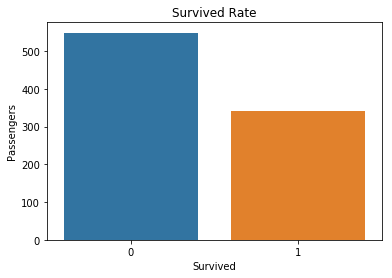

Int64Index([0, 1], dtype='int64')


In [10]:
# get target y - y is a series - which is one column
y = df_train_preprocessed["Survived"]    
y_class_counts = y.value_counts()

# plot Passengers vs.Survived
plt.figure()    
sns.barplot(y_class_counts.index, y_class_counts.values)
plt.title("Survived Rate")
plt.ylabel("Passengers")
plt.xlabel("Survived")
plt.show()

# 0 for dead, 1 for survive
print(y_class_counts.index)

In [0]:
# get feature x - feature is the other columns - feature input / target - output
X = df_train_preprocessed.drop(labels=["Survived"], axis=1) # drop target axis 1 cuz column

# we need to split data to create training and validation data - splitting from x and y   - testsize means from 20% test 80% training - strat = y cuz if we split data we want train and valid data to have same amount of 0 and 1
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)

# get all the columns and get mean - makes data uniform meaning it scales data
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)

In [12]:
# gives us best parameter of model - hyperparameter
# define grid for possible parameters
knn_grid = { "n_neighbors": [3, 5, 7], "weights": ["uniform","distance"] }

# create model
knn_classifier = KNeighborsClassifier()

# run model 5 times cv-cross validation
grid_search = GridSearchCV(knn_classifier, knn_grid, n_jobs=-1, cv=5)

# fit the model
grid_search.fit(X_train, y_train)

# find the best parameter
print("Best K and Parameters:")
print(grid_search.best_params_)

#grid search cv model
knn_classifier = KNeighborsClassifier(n_neighbors=7, weights="uniform")

knn_classifier.fit(X_train, y_train)

Best K and Parameters:
{'n_neighbors': 7, 'weights': 'uniform'}


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [13]:
# pass validation and get prediciton for y
y_predicted = knn_classifier.predict(X_val)

# calculate accuracy score value
accuracy_score_value = accuracy_score(y_val, y_predicted) * 100
accuracy_score_value = float("{0:0.2f}".format(accuracy_score_value))    
print("classification accuracy score:")
print(accuracy_score_value)

confusion_matrix_result = confusion_matrix(y_val, y_predicted)
print("classification confusion matrix:")

# for predic they didnt survive, 96 correct and 14 incorrect
# for predic they survive, 53 correct, 16 incorrect
print(confusion_matrix_result)

classification accuracy score:
81.01
classification confusion matrix:
[[95 15]
 [19 50]]


In [14]:
knn_classifier = KNeighborsClassifier(n_neighbors=3, weights="uniform")

knn_classifier.fit(X_train, y_train)

# pass validation and get prediciton for y
y_predicted = knn_classifier.predict(X_val)

# calculate accuracy score value
accuracy_score_value = accuracy_score(y_val, y_predicted) * 100
accuracy_score_value = float("{0:0.2f}".format(accuracy_score_value))    
print("classification accuracy score:")
print(accuracy_score_value)

# calculate confusion_matrix
confusion_matrix_result = confusion_matrix(y_val, y_predicted)
print("classification confusion matrix:")

# for predic they didnt survive, 96 correct and 14 incorrect
# for predic they survive, 53 correct, 16 incorrect
print(confusion_matrix_result)

classification accuracy score:
83.8
classification confusion matrix:
[[97 13]
 [16 53]]


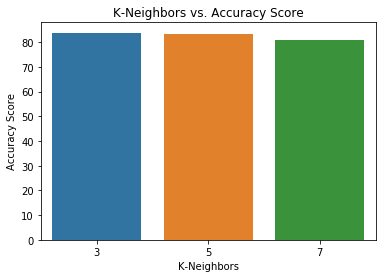

In [15]:
n_neighbors = [3, 5, 7]
accuracy_score = [83.8, 83.24, 81.01]    
plt.figure()    
sns.barplot(n_neighbors, accuracy_score)
plt.title("K-Neighbors vs. Accuracy Score")
plt.ylabel("Accuracy Score")
plt.xlabel("K-Neighbors")
plt.show()

In [0]:
# data cleanup - same cleanup - test and training has to have same cleanup
X_test = get_data_preprocessed(csv_test_file)

# method as training
X_test = scaler.transform(X_test)

# use our model and pass test data
y_predicted = knn_classifier.predict(X_test)

# assign id to survived or not
df_submission = pd.DataFrame({"PassengerId": csv_test_file["PassengerId"], "Survived": y_predicted})

# csv submission file name
csv_submission_file = "titanic_submission.csv"

In [0]:
# submission file with ID
with open('/content/gdrive/My Drive/class_tables/knn_titanic_submission.csv', 'w') as f:
  df_submission.to_csv(f, encoding='utf-8', index=False)